In [33]:
import json
data = 0
with open('C:\\Users\\mechadmin\\Desktop\\reseach\\cp_w_epoch_20000.json') as f:
    data = json.load(f)


In [17]:
data.keys()

dict_keys(['cp', 'w', 'ub', 'dp'])

In [44]:
import numpy as np
cpts = np.array(data['cp'][0])
weights = np.array(data['w'][0])

In [43]:
cpts.shape

(1200, 64, 2)

In [38]:
weights.shape

(64, 1)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
(64,)
<KnotVector p=3 sz=68>
(64, 2)
(64,)
(64,)


c:\Users\mechadmin\Documents\GitHub\pyiga\.venv\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['grid', 'f', 'identity']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


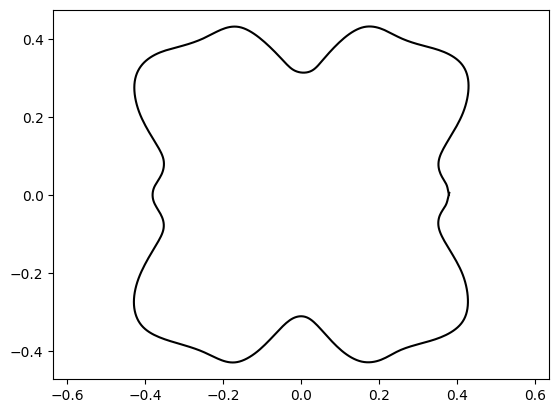

In [63]:
from pyiga.geometry import *
%pylab inline
import scipy
from pyiga import bspline, assemble, vform, geometry, vis, solvers
import numpy as np
from pyiga import approx, bspline
n_kv = 61
kv = bspline.make_knots(3, 0.0, 1.0, n_kv)
degree = 3
num = cpts.shape[1]
knots = [0] * (degree + 1) + [i / (num - degree) for i in range(1, num - degree)] + [1] * (degree + 1)
coeff = cpts
grid = (np.linspace(0.0, 1.0, 100),)
# weights = np.random.random(coeff.shape[0])*5
# weights = np.ones(coeff.shape[0])
N = tuple(kv.numdofs for kv in (kv,))
print(N)
print(kv)
print(coeff.shape)
print(weights.squeeze().shape)
nurbs = NurbsFunc((kv,), coeff.copy(), weights=weights.squeeze())
vals = nurbs.grid_eval(grid)

vis.plot_geo(nurbs,res=500, linewidth=None, color='black')
axis('equal');


(101,)
(64, 101)


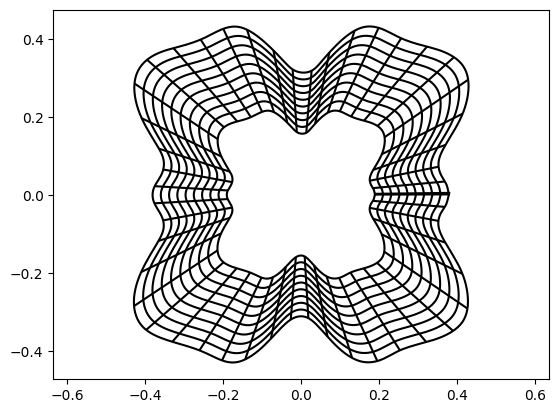

In [64]:
g = geometry.line_segment([0.5,0.5], [1,1], intervals=100)
geo = geometry.outer_product(nurbs, g)
grid = (np.linspace(0.0, 1.0, 8),)
vis.plot_geo(geo, gridx = 50, gridy = 10, grid = grid, res = 400)
axis('equal');

grid eval from bspline function is used
grid eval from bspline function is used
grid eval from bspline function is used


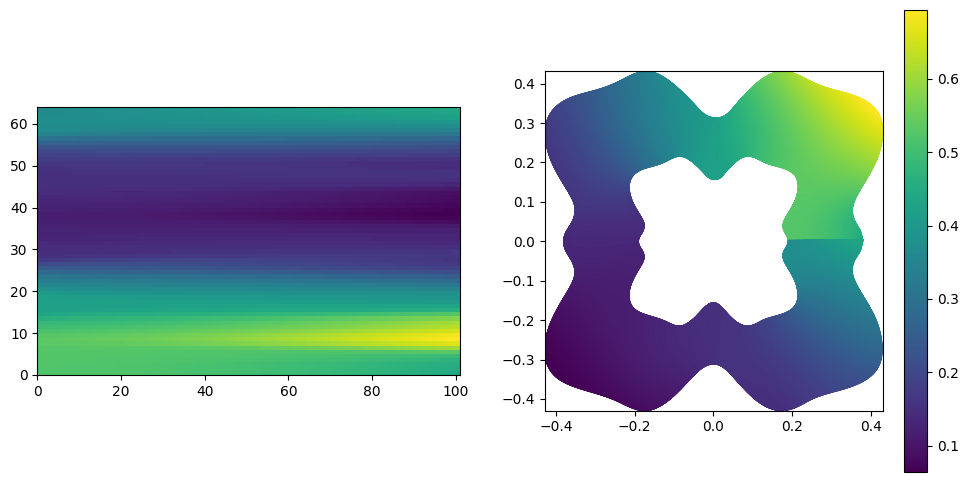

In [65]:
g = lambda x,y: np.exp(-(x-.8)**2 - (y-.8)**2)  # Dirichlet BC function
f = lambda x,y: 3 * np.sin(10*x) * np.cos(10*y) # source term
kvs = geo.kvs
# compute Dirichlet boundary conditions
bcs = assemble.compute_dirichlet_bcs(kvs, geo, [('right', g), ('top', g)])

# compute right-hand side from function f
rhs = assemble.inner_products(kvs, f, f_physical=True, geo=geo).ravel()
# set up and solve linear system
A = assemble.stiffness(kvs, geo)
LS = assemble.RestrictedLinearSystem(A, rhs, bcs)

u = scipy.sparse.linalg.spsolve(LS.A, LS.b)
u_func = geometry.BSplineFunc(kvs, LS.complete(u))
# plot coefficients and solution
figsize(12,6)

subplot(1,2,1)
pcolormesh(u_func.coeffs)
gca().set_aspect('equal')

subplot(1,2,2)
vis.plot_field(u_func, geo, res = 500)
gca().set_aspect('equal')
colorbar();

In [4]:
len(data['cp'])

1200

In [19]:
# d = data['save_20000']

import ast
import numpy as np
def parse_str(s):
    # Step 1: Split the string by '|'
    print(s)
    parts = s.split('|')

    # Step 2: Use ast.literal_eval to convert each part to a list
    arrays = [np.array(ast.literal_eval(part)) for part in parts]

    return arrays

cpts = parse_str(cp)
weights = parse_str(we)

[[[0.37917906045913696, 0.0008423755061812699], [0.3758295476436615, 0.0174311101436615], [0.37467074394226074, 0.026583436876535416], [0.35508692264556885, 0.053097937256097794], [0.348482221364975, 0.09020323306322098], [0.3771834373474121, 0.13974431157112122], [0.41976284980773926, 0.20824812352657318], [0.4350540339946747, 0.28436416387557983], [0.41780948638916016, 0.33912357687950134], [0.3652118444442749, 0.37015268206596375], [0.3057175576686859, 0.3835194706916809], [0.25376853346824646, 0.4003448486328125], [0.20899230241775513, 0.42782723903656006], [0.16111315786838531, 0.43666210770606995], [0.1086668074131012, 0.4045654237270355], [0.05486331507563591, 0.34561213850975037], [0.02826223522424698, 0.31072527170181274], [-0.01823313906788826, 0.31281861662864685], [-0.0454418770968914, 0.3447689414024353], [-0.10200198739767075, 0.4025017023086548], [-0.15684252977371216, 0.4368869662284851], [-0.203508660197258, 0.4268300235271454], [-0.2475351095199585, 0.4002021253108978

AttributeError: 'list' object has no attribute 'split'

In [22]:
np.array(cp).shape

(1200, 64, 2)

In [24]:
cpts = data['cp']
weights = data['w']

In [25]:
cpts[0]

[[0.37917906045913696, 0.0008423755061812699],
 [0.3758295476436615, 0.0174311101436615],
 [0.37467074394226074, 0.026583436876535416],
 [0.35508692264556885, 0.053097937256097794],
 [0.348482221364975, 0.09020323306322098],
 [0.3771834373474121, 0.13974431157112122],
 [0.41976284980773926, 0.20824812352657318],
 [0.4350540339946747, 0.28436416387557983],
 [0.41780948638916016, 0.33912357687950134],
 [0.3652118444442749, 0.37015268206596375],
 [0.3057175576686859, 0.3835194706916809],
 [0.25376853346824646, 0.4003448486328125],
 [0.20899230241775513, 0.42782723903656006],
 [0.16111315786838531, 0.43666210770606995],
 [0.1086668074131012, 0.4045654237270355],
 [0.05486331507563591, 0.34561213850975037],
 [0.02826223522424698, 0.31072527170181274],
 [-0.01823313906788826, 0.31281861662864685],
 [-0.0454418770968914, 0.3447689414024353],
 [-0.10200198739767075, 0.4025017023086548],
 [-0.15684252977371216, 0.4368869662284851],
 [-0.203508660197258, 0.4268300235271454],
 [-0.247535109519958

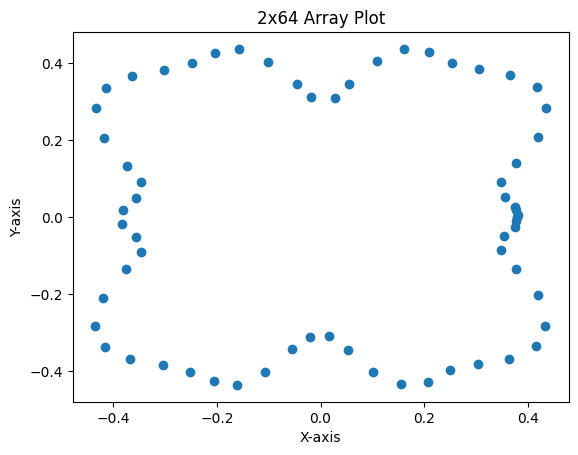

In [26]:
import numpy as np
import matplotlib.pyplot as plt
cpt = np.array(cpts[0])
weight = np.array(weights[10])

# Plot the data
plt.scatter(cpt[:,0], cpt[:,1])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x64 Array Plot')

# Show the plot
plt.show()

In [72]:
last_10_keys = list(data.keys())[-100:]
print(last_10_keys)

['save_10100', 'save_10200', 'save_10300', 'save_10400', 'save_10500', 'save_10600', 'save_10700', 'save_10800', 'save_10900', 'save_11000', 'save_11100', 'save_11200', 'save_11300', 'save_11400', 'save_11500', 'save_11600', 'save_11700', 'save_11800', 'save_11900', 'save_12000', 'save_12100', 'save_12200', 'save_12300', 'save_12400', 'save_12500', 'save_12600', 'save_12700', 'save_12800', 'save_12900', 'save_13000', 'save_13100', 'save_13200', 'save_13300', 'save_13400', 'save_13500', 'save_13600', 'save_13700', 'save_13800', 'save_13900', 'save_14000', 'save_14100', 'save_14200', 'save_14300', 'save_14400', 'save_14500', 'save_14600', 'save_14700', 'save_14800', 'save_14900', 'save_15000', 'save_15100', 'save_15200', 'save_15300', 'save_15400', 'save_15500', 'save_15600', 'save_15700', 'save_15800', 'save_15900', 'save_16000', 'save_16100', 'save_16200', 'save_16300', 'save_16400', 'save_16500', 'save_16600', 'save_16700', 'save_16800', 'save_16900', 'save_17000', 'save_17100', 'save

In [ ]:
for i in range(len(cpts)):
    d = data[i]
    cp = d['control_points']
    we = d['weights']
    # cpts = parse_str(cp)
    # weights = parse_str(we)
    for j in range(20):
        cpt = np.array(cpts[j])
        weight = np.array(weights[j])
        cor = False
        for k in range(len(cpt[0])):
            if 0 <= cpt[0][k] < 0.1 and 0 <= cpt[1][k] < 0.1:
                cor = True
        if not cor:
            print(i)
            print(j)       

In [ ]:
for i in last_10_keys:
    d = data[i]
    cp = d['control_points']
    we = d['weights']
    cpts = parse_str(cp)
    weights = parse_str(we)
    for j in range(20):
        cpt = np.array(cpts[j])
        weight = np.array(weights[j])
        cor = False
        for k in range(len(cpt[0])):
            if 0 <= cpt[0][k] < 0.1 and 0 <= cpt[1][k] < 0.1:
                cor = True
        if not cor:
            print(i)
            print(j)                                     
    

In [12]:
import itertools

def gen_grid(d, points_per_axis, lb=0., rb=1.):
    ''' Generate a grid in a d-dimensional space 
        within the range [lb, rb] for each axis '''
    
    lincoords = []
    for i in range(0, d):
        lincoords.append(np.linspace(lb, rb, points_per_axis))
    coords = list(itertools.product(*lincoords))
    
    return np.array(coords)
X = cpt
Z = None
scale = 0.8
points_per_axis = None
if Z is None or Z.shape[1] != 2 or points_per_axis is None:
    N = X.shape[0]
    points_per_axis = int(N**.5)
    bounds = (0., 3.)
    Z = gen_grid(2, points_per_axis, bounds[0], bounds[1]) # Generate a grid
    
scale /= points_per_axis*1.3
z = 0
for (i, z) in enumerate(Z):
        z =z

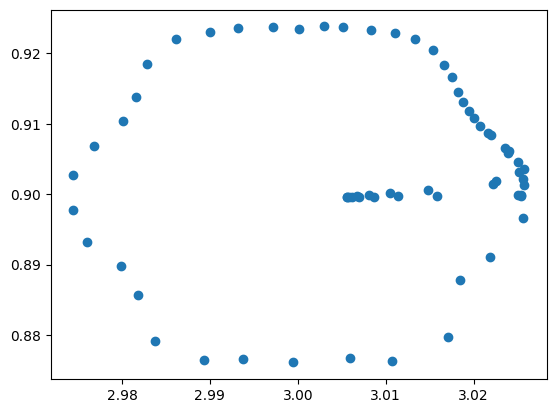

In [13]:
xys = cpt
xscl = scale
yscl = scale
z1 = z[0]
z2 = .3*z[1]
max_distance = 0.3
scaled_coords = [(x * xscl + z1, y * yscl + z2) for (x, y) in xys]
segments = []
segment = [scaled_coords[0]]
for i in range(1, len(scaled_coords)):
    dist = np.sqrt((scaled_coords[i][0] - segment[-1][0]) ** 2 +
                    (scaled_coords[i][1] - segment[-1][1]) ** 2)
    if dist <= max_distance:
        segment.append(scaled_coords[i])
    else:
        segments.append(segment)
        segment = [scaled_coords[i]]
segments.append(segment)
scaled_coords = np.array(scaled_coords)
plt.scatter(scaled_coords[:,0] ,scaled_coords[:,1])


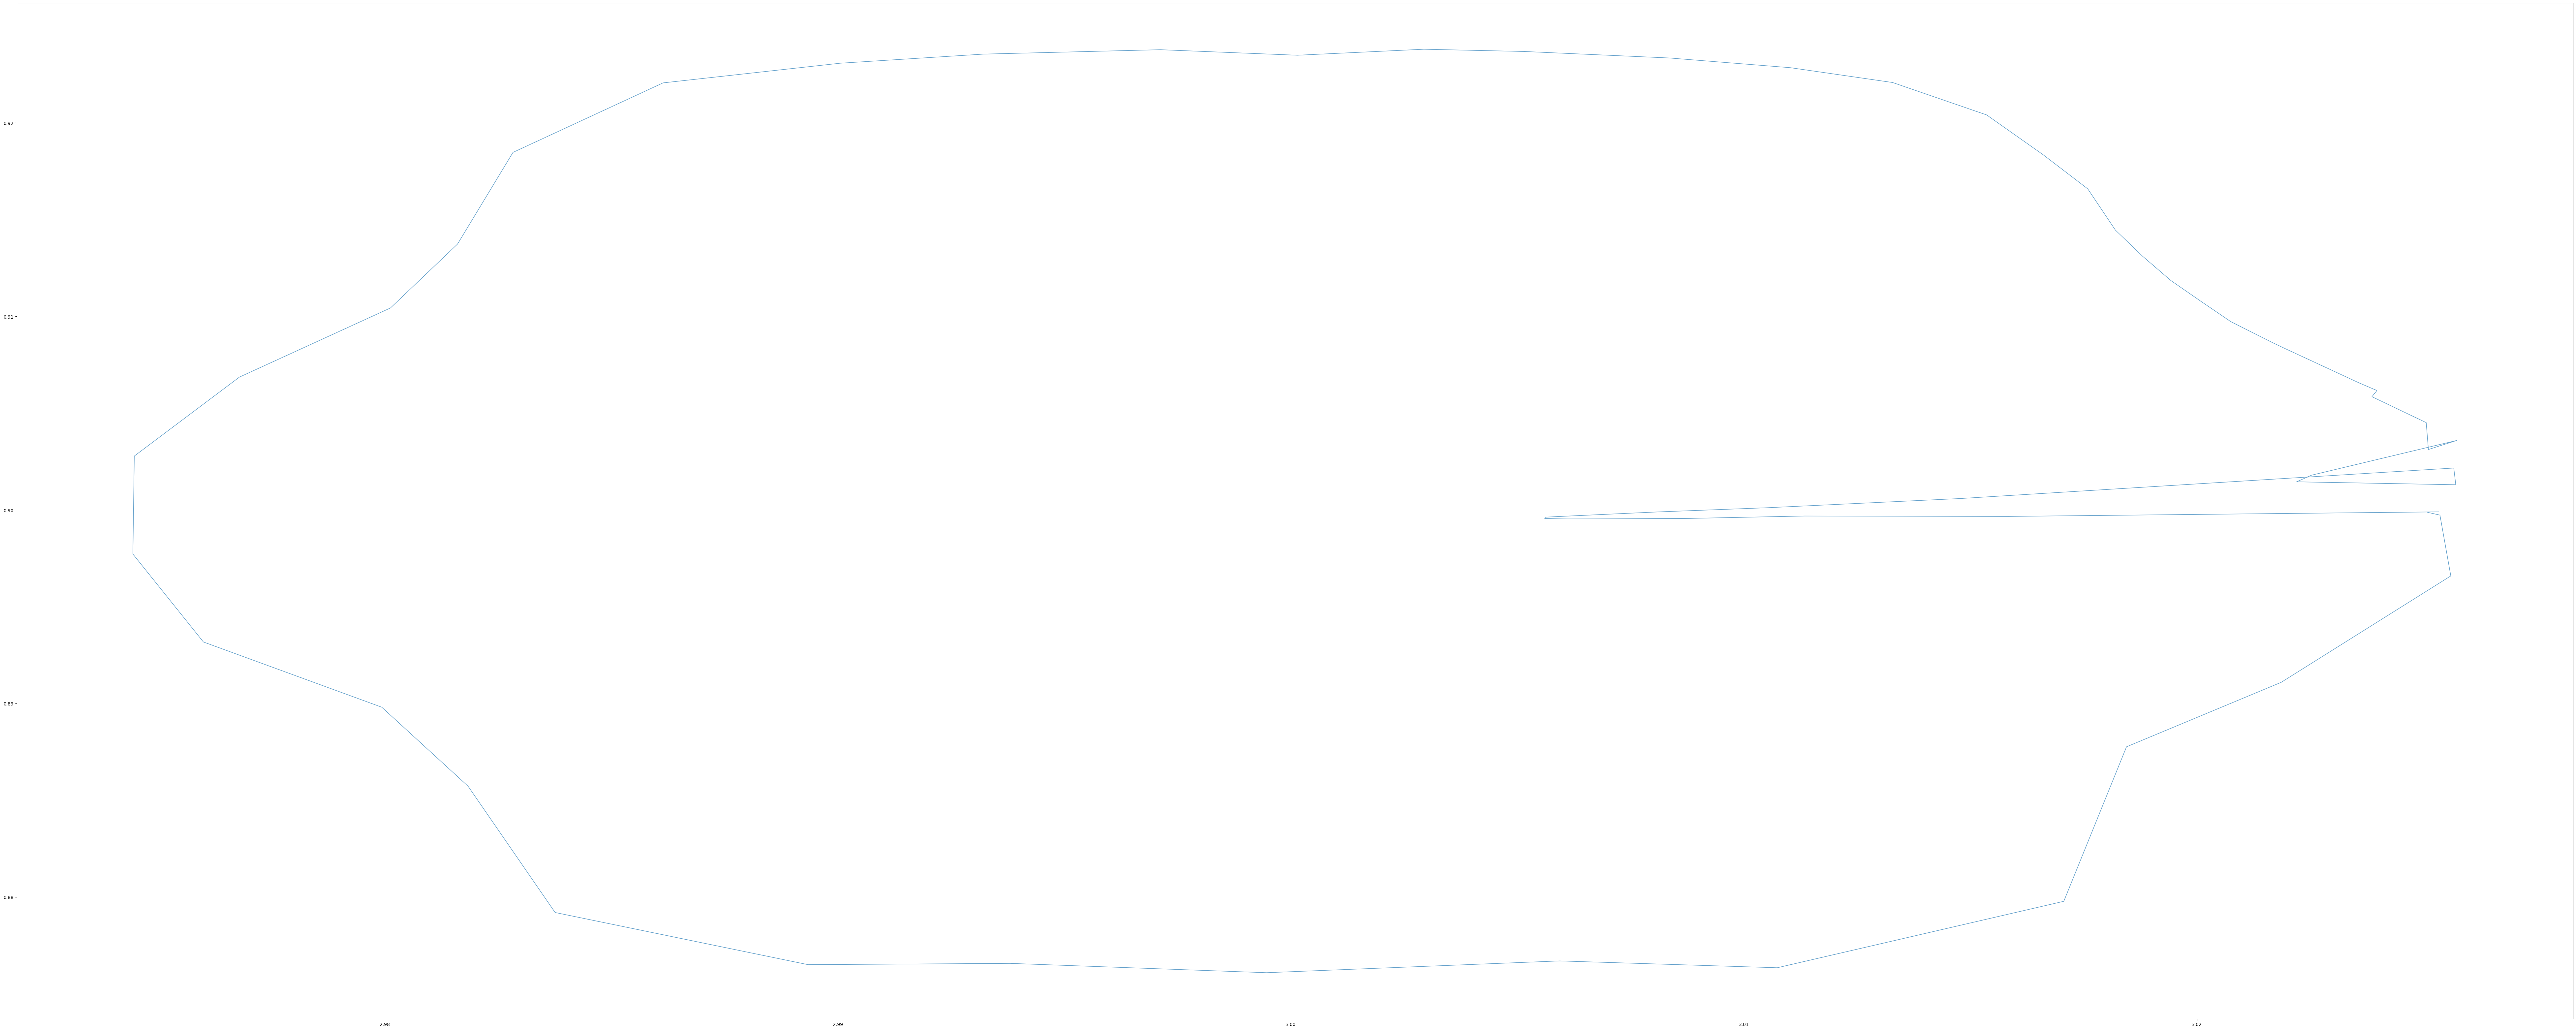

In [9]:
fig = plt.figure(figsize=(100, 40))
ax = fig.add_subplot(111)
for segment in segments:
    ax.plot(*zip(*segment),lw=1.2, alpha=.7)
segments = np.array(segments[0])

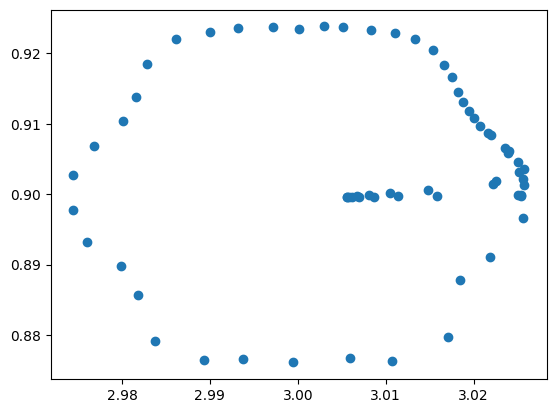